In [43]:
import seml
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import utils
import os

In [86]:
from statannotations.Annotator import Annotator

In [2]:
6

6

In [3]:
fig_path = '/storage/groups/ml01/workspace/laura.martens/atac_poisson_data/panels/Figure2'

In [25]:
def plot_eval(data, x, y, hue, hue_order=None, save=None, x_label=None, y_label=None, order=None, type_="bar"):
    fig, ax = plt.subplots(figsize = (12, 8))
    if type_=="bar":
        sns.barplot(data = data, x=x, y=y, hue=hue, hue_order = hue_order, ci = "sd", ax = ax, order=order)
    elif type_=="box":
        sns.boxplot(data = data, x=x, y=y, hue=hue, hue_order = hue_order, ax = ax, order=order)
        
    plt.legend(loc='lower left')
    if x_label:
        plt.xlabel(x_label)
    else:
        plt.xlabel(x.split(".")[-1])
    if y_label:
        plt.ylabel(y_label)
    else:
        plt.ylabel(y.split(".")[-1])
    
    if save:
        plt.tight_layout()
        plt.savefig(os.path.join(save, f'{y.split(".")[-1]}_{x.split(".")[-1]}_{"_".join(hue_order)}.pdf'))

        

In [67]:
def load_seml(seml_database):
    results = seml.get_results(seml_database, to_data_frame=True,  fields=["config", "config_hash", "result", "batch_id"],)

    results.loc[results['config.data.batch'].apply(isinstance,args = [list]), 'config.data.batch'] = 'Neurips\nall batches'
    results.loc[results['config.data.batch'].isna(), 'config.data.batch'] = 'Satpathy\net al.'

    results.loc[results['config.data.dataset'] == "neurips_count", 'config.model.model_type'] = "cistopic_count"

    model_type_map = {
        'baseline':"encoder-decoder,poisson loss, baseline", 
        'count': "encoder-decoder, poisson loss, non-linear decoder",
        'cistopic': "cisTopic", 
        'gex':"encoder-decoder, poisson loss, RNA input" , 
        'linear_count': "encoder-decoder, poisson loss",
        'peakvi': "PEAKVI",
        'scale_binary':'scale_binary', 
        'gex_binary':'gex_binary' 
    }

    results["config.model.model_type"] = results["config.model.model_type"].map(model_type_map)
    
    return results

In [12]:
batch_order = ['Neurips\nall batches', 's1d1', 's1d2', 's1d3', 's2d1',
       's2d4', 's2d5', 's3d10', 's3d3', 's3d6', 's3d7', 'Satpathy\net al.']

In [94]:
model_order = [model_type_map['linear_count'], model_type_map["peakvi"]]

# Plot best n_latent per model class

## Load database

In [70]:
seml_database = 'atac_atac_prediction_counts'

In [71]:
results = load_seml(seml_database)

  0%|          | 0/344 [00:00<?, ?it/s]

  0%|          | 0/344 [00:00<?, ?it/s]

<AxesSubplot:xlabel='config.setup.model_params.n_latent', ylabel='result.nmi'>

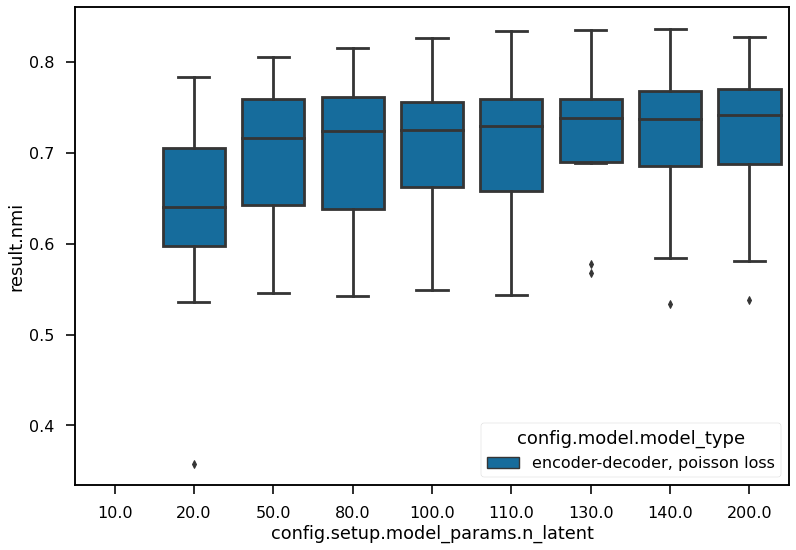

In [81]:
sns.boxplot(data = results, x='config.setup.model_params.n_latent', y='result.nmi', hue='config.model.model_type', hue_order = [model_type_map['linear_count']], order=None, )

<AxesSubplot:xlabel='config.setup.model_params.n_latent', ylabel='result.ari'>

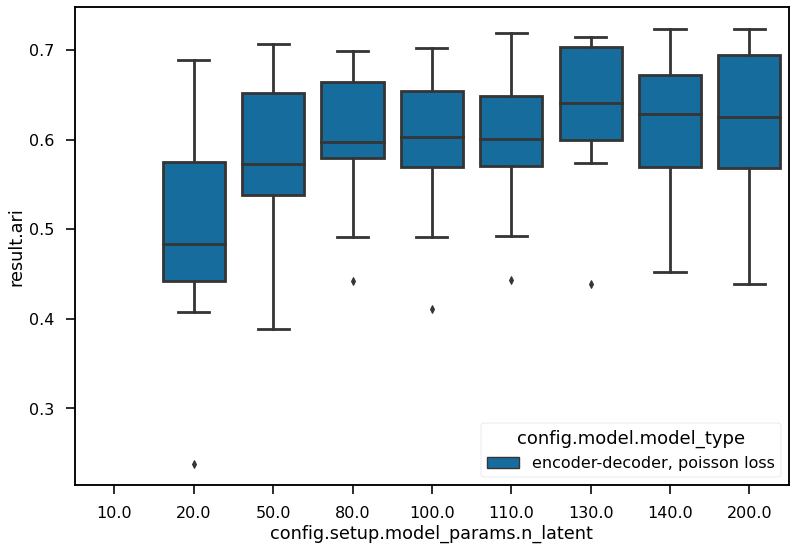

In [82]:
sns.boxplot(data = results, x='config.setup.model_params.n_latent', y='result.ari', hue='config.model.model_type', hue_order = [model_type_map['linear_count']], order=None, )

In [77]:
table = results.loc[results['config.model.model_type'].isin(model_order)].groupby(['config.model.model_type','config.setup.model_params.n_latent']).agg(['mean', 'std'])
table = table.loc[:, table.columns.get_level_values(0).str.contains("result")]

/tmp/ipykernel_132038/2165341687.py:1: FutureWarning: ['config_hash', 'config.db_collection', 'config.data.batch', 'config.data.dataset', 'config.setup.batch_key', 'config.setup.label_key', 'config.setup.layer', 'config.training.project_name', 'config.training.save_path', 'result.test_cells', 'result.embedding', 'result.model_path', 'config.setup.model_params.use_layer_norm'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  table = results.loc[results['config.model.model_type'].isin(model_order)].groupby(['config.model.model_type','config.setup.model_params.n_latent']).agg(['mean', 'std'])


In [78]:
table

result.average_precision  \
                                                                                                         mean   
config.model.model_type                           config.setup.model_params.n_latent                            
PEAKVI                                            20.0                                               0.203612   
                                                  50.0                                               0.209649   
                                                  80.0                                               0.209469   
                                                  100.0                                              0.206607   
                                                  110.0                                              0.209415   
                                                  130.0                                              0.209765   
                                                  140.0                                              0.208890   
                                                  200.0                                              0.209672   
encoder-decoder, poisson loss                     20.0                                               0.249046   
                                                  50.0                                               0.250742   
                                                  80.0                                               0.250911   
                                                  100.0                                              0.250836   
                                                  110.0                                              0.251027   
                                                  130.0                                              0.250993   
                                                  140.0                                              0.250999   
                                                  200.0                                              0.250975   
encoder-decoder, poisson loss, non-linear decoder 50.0                                               0.250358   
                                                  80.0                                               0.250180   
                                                  130.0                                              0.267559   
                                                  200.0                                              0.267510   

                                                                                                \
                                                                                           std   
config.model.model_type                           config.setup.model_params.n_latent             
PEAKVI                                            20.0                                0.047970   
                                                  50.0                                0.050387   
                                                  80.0                                0.051075   
                                                  100.0                               0.052328   
                                                  110.0                               0.050903   
                                                  130.0                               0.050863   
                                                  140.0                               0.051082   
                                                  200.0                               0.050840   
encoder-decoder, poisson loss                     20.0                                0.043722   
                                                  50.0                                0.043992   
                                                  80.0                                0.044020   
                                                  100.0                               0.044259   
               

# Plot results for cross validation

## Load results from seml database

In [83]:
seml_database = 'cv_atac_atac_prediction'

In [84]:
results = load_seml(seml_database)

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

## Create plots

In [175]:
x = 'config.data.batch'
y = 'result.rmse'
hue='config.model.model_type'
order = batch_order
hue_order = model_order

(<AxesSubplot:xlabel='config.data.batch', ylabel='result.rmse'>,
  <statannotations.Annotation.Annotation at 0x7f24fae896a0>])

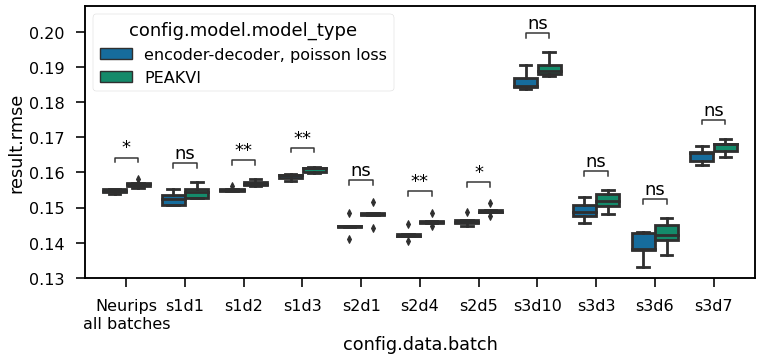

In [184]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(data = results, x=x, y=y, hue=hue, hue_order = hue_order,order=order[:-1], orient="v", ax=ax)
annot = Annotator(ax, pairs, data=results, x=x, y=y, order=order[:-1], hue=hue, hue_order=hue_order)
#annot.new_plot(ax, pairs, data=results, x=x, y=y, order=order[:-1], hue=hue, hue_order=hue_order)
annot.configure(test='t-test_ind', verbose=0)
annot.apply_test()
annot.annotate()

In [223]:
value="result.nmi"

In [224]:
test = results.loc[:,[value, "config.model.model_type", "config.data.batch"]].groupby(["config.model.model_type", "config.data.batch"]).agg("mean").reset_index()

In [225]:
sns_df = test.pivot(columns="config.model.model_type", values=value, index='config.data.batch' )

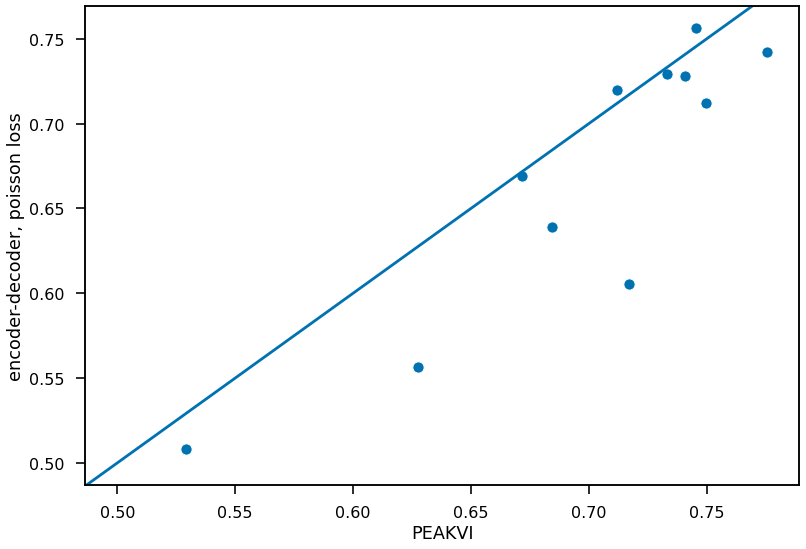

In [233]:
sns.scatterplot(data= sns_df, x='PEAKVI', y='encoder-decoder, poisson loss')
plt.axline(slope=1, xy1=(0.5, 0.5))

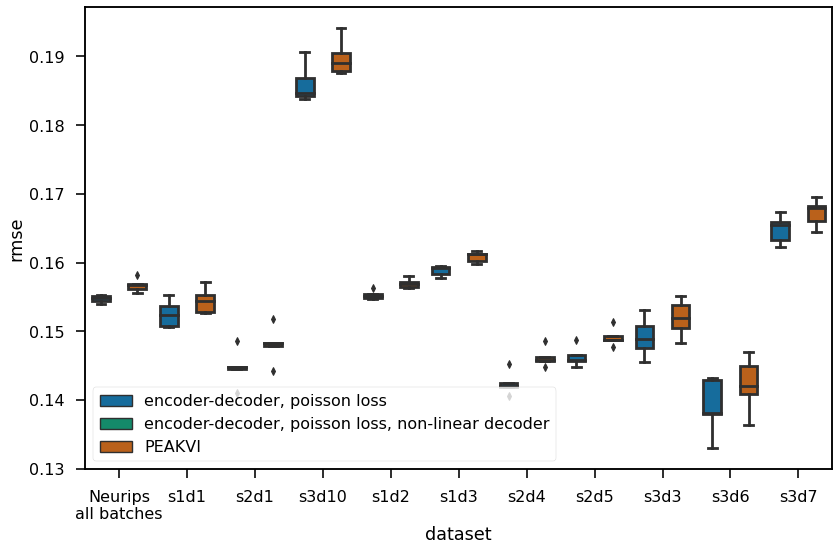

In [85]:
plot_eval(data=results, x='config.data.batch', y='result.rmse', hue='config.model.model_type', hue_order = model_order, x_label="dataset", save=fig_path, type_="box")

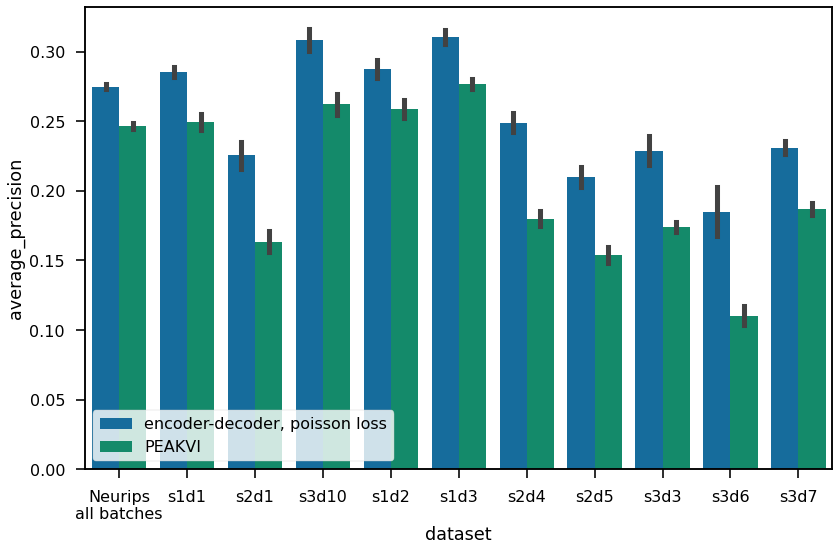

In [16]:
plot_eval(data=results, x='config.data.batch', y='result.average_precision', hue='config.model.model_type', hue_order = model_order, x_label="dataset", save=fig_path)

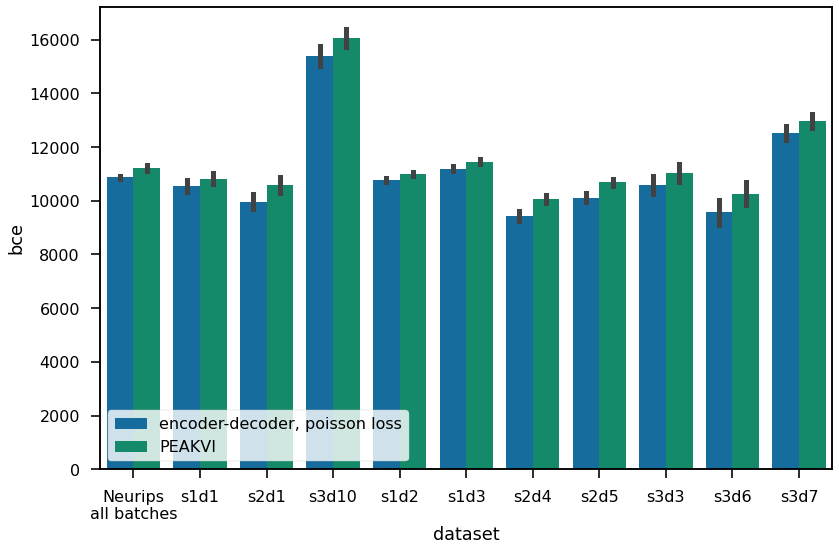

In [17]:
plot_eval(data=results, x='config.data.batch', y='result.bce', hue='config.model.model_type', hue_order = model_order, x_label="dataset", save=fig_path)

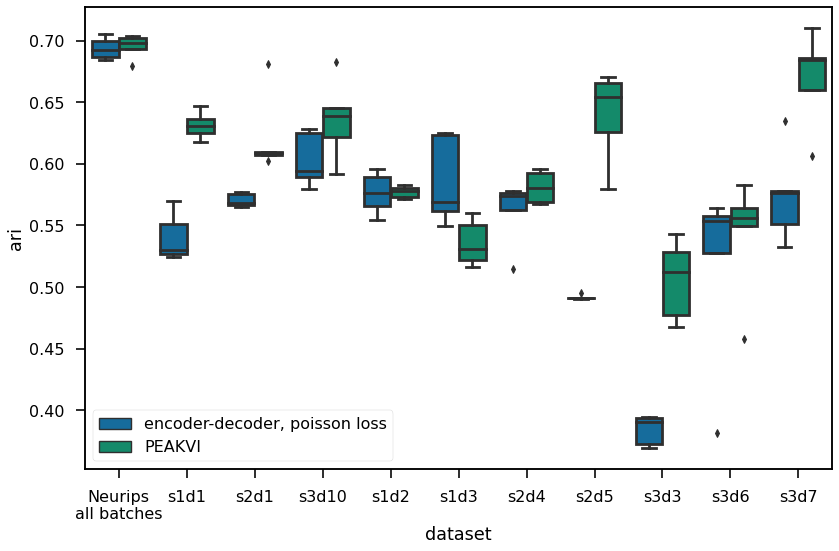

In [27]:
plot_eval(data=results, x='config.data.batch', y='result.ari', hue='config.model.model_type', hue_order = model_order, x_label="dataset", save=fig_path, type_="box")

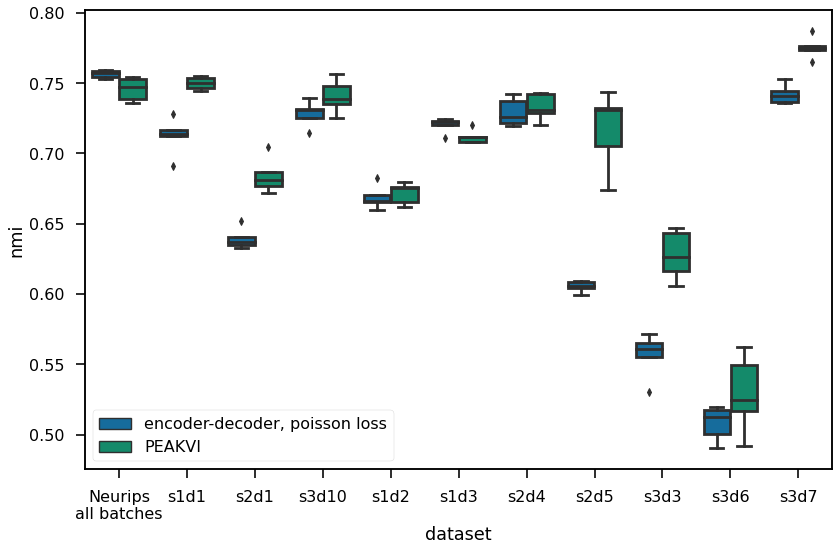

In [28]:
plot_eval(data=results, x='config.data.batch', y='result.nmi', hue='config.model.model_type', hue_order = model_order, x_label="dataset", save=fig_path, type_="box")

# Integration metrics

In [40]:
df = results.loc[results["config.data.batch"]=='Neurips\nall batches', ("result.embedding", "config.model.model_type")]

In [59]:
test = pd.concat(df["result.embedding"].values, axis=1)

In [60]:
test.columns = df["config.model.model_type"]

In [61]:
test = test.melt(ignore_index=False).reset_index()

In [63]:
test

,index,config.model.model_type,value
0,NMI_cluster/label,"encoder-decoder, poisson loss",0.755180
1,ARI_cluster/label,"encoder-decoder, poisson loss",0.684648
2,ASW_label,"encoder-decoder, poisson loss",0.524045
3,ASW_label/batch,"encoder-decoder, poisson loss",0.932584
4,PCR_batch,"encoder-decoder, poisson loss",0.364061
...,...,...,...
121,kBET,"encoder-decoder, poisson loss",NaN
122,iLISI,"encoder-decoder, poisson loss",NaN
123,cLISI,"encoder-decoder, poisson loss",NaN
124,hvg_overlap,"encoder-decoder, poisson loss",NaN


<AxesSubplot:xlabel='value', ylabel='index'>

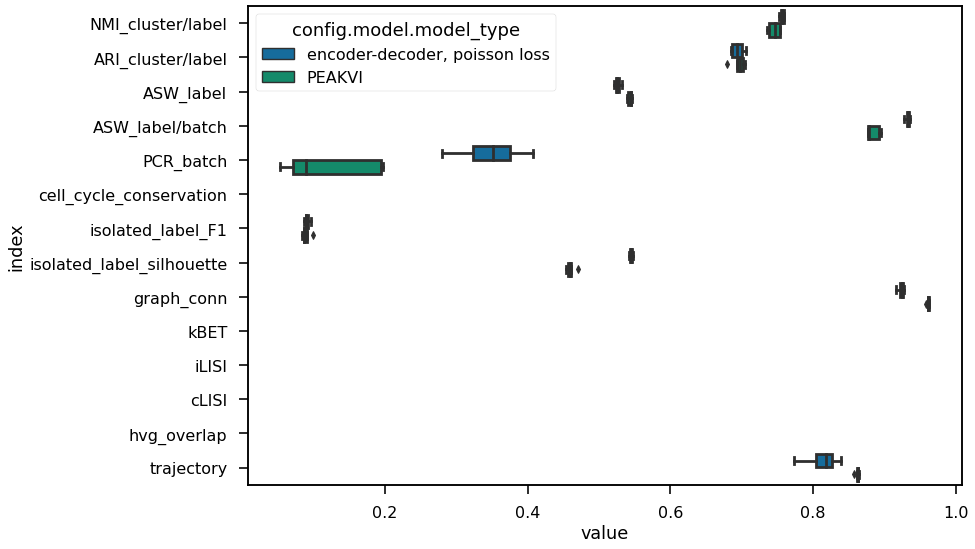

In [66]:
sns.boxplot(data=test, y = 'index', x = "value", hue="config.model.model_type", orient="h")